In [76]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt

In [77]:
from data import *
X, Y, dictionary = loadTextDataBinary('data/sentiment.tr') 
print(X.shape)
print(Y.shape)

(1400, 3473)
(1400,)


In [78]:
Y
for i in range(len(dictionary)):
    if dictionary[i] == 'bad':
        print(i)
res = [i for i in range(1400) if X[i, 531] == 1]
print(len(res))

531
534


In [79]:
dt = DecisionTreeClassifier(max_depth=1)
dt.fit(X, Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [80]:
showTree(dt,dictionary)

bad?
-N-> class 1	(333.0 for class 0, 533.0 for class 1)
-Y-> class 0	(358.0 for class 0, 176.0 for class 1)


In [85]:
np.mean(dt.predict(X) == Y)

0.6364285714285715

In [88]:
Xtest, Ytest, _ = loadTextDataBinary('data/sentiment.te', dictionary)
Xdev, Ydev, _ = loadTextDataBinary('data/sentiment.de', dictionary)
print(Xtest.shape)
print(np.mean(dt.predict(Xtest) == Ytest))
print(np.mean(dt.predict(Xdev) == Ydev))

(400, 3473)
0.595
0.605


In [57]:
dt2 = DecisionTreeClassifier(max_depth=2)
dt2.fit(X,Y)
showTree(dt2,dictionary)

bad?
-N-> worst?
|    -N-> class 1	(281.0 for class 0, 514.0 for class 1)
|    -Y-> class 0	(52.0 for class 0, 19.0 for class 1)
-Y-> stupid?
|    -N-> class 0	(281.0 for class 0, 168.0 for class 1)
|    -Y-> class 0	(77.0 for class 0, 8.0 for class 1)


In [61]:
Xde, Yde, _ = loadTextDataBinary('data/sentiment.de')
print(np.mean(dt2.predict(X) == Y))
print(Xde.shape, Yde.shape)
np.mean(dt2.predict(Xtest) == Ytest)

0.66
(200, 564) (200,)


0.615

In [92]:
errors = np.ones((3,20))
Xtr, Ytr, dictionary = loadTextDataBinary('data/sentiment.tr')
Xde, Yde, _ = loadTextDataBinary('data/sentiment.de')
print(Xde.shape)
Xte, Yte, _ = loadTextDataBinary('data/sentiment.te')
print(Xte.shape)
for i in range(20):
    dt = DecisionTreeClassifier(max_depth=i+1)
    dt.fit(Xtr, Ytr)
    errors[0,i] = np.mean(dt.predict(X) != Y)
    errors[1,i] = np.mean(dt.predict(Xdev) != Ydev)
    errors[2,i] = np.mean(dt.predict(Xtest) != Ytest)
      
print(errors)

(200, 564)
(400, 1117)
[[0.36357143 0.34       0.32357143 0.30071429 0.27714286 0.24428571
  0.22071429 0.185      0.16214286 0.14142857 0.11857143 0.10357143
  0.08428571 0.07       0.05071429 0.04714286 0.035      0.02642857
  0.01642857 0.01      ]
 [0.395      0.38       0.355      0.345      0.38       0.4
  0.355      0.365      0.365      0.39       0.39       0.41
  0.405      0.395      0.41       0.38       0.405      0.375
  0.395      0.36      ]
 [0.405      0.385      0.375      0.3675     0.3575     0.3725
  0.37       0.37       0.3825     0.385      0.385      0.385
  0.3725     0.39       0.365      0.39       0.35       0.4
  0.405      0.3975    ]]


In [90]:
np.ones((3,20))

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1.]])

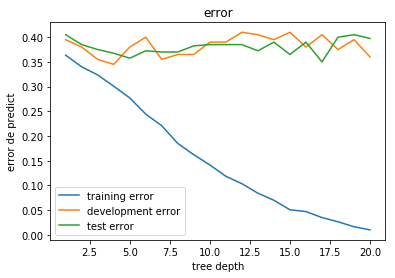

In [93]:
x = [i for i in range(1,21)]
legend = ["training error", 'development error', 'test error']
plt.plot(x, errors[0])
plt.plot(x, errors[1])
plt.plot(x, errors[2])
plt.xlabel("tree depth")
plt.ylabel("error de predict")
plt.title("error")
plt.legend(legend)
plt.show()

In [13]:
class Node(object):
    # definition for Node
    def __init__(self, data):
        self.data = data
        self.left = None
        self.right = None
def createNode(data):
    return Node(data)

def createTree(node, left, right):
    node.left = left
    node.right = right
    return node
    
def isLeaf(node):
    if not node.left:
        return True
    return False

def showTree(node):
    showTreein(node, 0)
    
def showTreein(node, level):
    if not node:
        return 0
    tab = ''
    for i in range(level):
        tab = tab + '  '
    print(tab, node.data)
    if node.left:
        showTreein(node.left, level+1)
    if node.right:
        showTreein(node.right, level+1)



In [14]:
 
t = createTree(createNode(1), createNode(2), createNode(3))
showTree(t)

 1
   2
   3


In [ ]:
def train(examples, labels):
    get_featrure_best_seperate_data(examples)